In [2]:
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

In [3]:
linelengths = [len(line) for line in open('hamlet.txt')]

In [4]:
print linelengths


[9, 27, 2, 24, 2, 2, 2, 2, 22, 2, 28, 60, 29, 28, 27, 22, 22, 24, 25, 18, 24, 11, 21, 20, 22, 32, 10, 28, 31, 12, 22, 27, 2, 51, 32, 2, 67, 13, 2, 18, 2, 2, 2, 8, 2, 50, 2, 49, 2, 6, 14, 2, 7, 45, 2, 6, 21, 2, 7, 11, 2, 6, 5, 2, 7, 41, 2, 6, 53, 2, 7, 48, 25, 2, 6, 27, 2, 7, 23, 2, 6, 19, 39, 46, 2, 7, 48, 2, 32, 2, 6, 25, 2, 6, 27, 2, 7, 22, 2, 6, 30, 24, 2, 7, 24, 22, 2, 9, 2, 6, 18, 2, 6, 6, 25, 2, 6, 17, 2, 6, 45, 2, 6, 47, 2, 6, 22, 2, 6, 36, 42, 48, 38, 45, 37, 42, 2, 6, 32, 2, 6, 18, 41, 42, 31, 2, 6, 20, 41, 2, 6, 20, 51, 51, 43, 30, 2, 6, 51, 2, 23, 2, 6, 48, 2, 6, 43, 2, 6, 47, 2, 6, 49, 2, 6, 23, 2, 6, 23, 2, 6, 50, 42, 40, 54, 2, 6, 17, 2, 6, 22, 2, 6, 42, 2, 15, 2, 6, 33, 2, 6, 46, 42, 22, 2, 6, 41, 38, 19, 2, 6, 26, 2, 6, 25, 36, 40, 45, 42, 15, 2, 6, 48, 47, 2, 6, 48, 44, 48, 2, 6, 49, 47, 43, 43, 41, 50, 43, 46, 50, 30, 2, 6, 13, 47, 42, 44, 45, 53, 53, 53, 36, 50, 45, 39, 43, 35, 50, 39, 49, 36, 47, 41, 39, 48, 42, 39, 46, 45, 41, 50, 44, 2, 6, 37, 47, 49, 45, 2, 6, 41

In [6]:
with open('hamlet.txt') as hfile:
    htxt = hfile.read()
    htok = htxt.split()
    print len(htok), len(set(htok))

31659 7967


In [7]:
from collections import Counter

In [9]:
freq = Counter(htok)

In [14]:
print freq['ghost']

2


In [15]:
counts = dict()
for i in htok:
    counts[i] = counts.get(i, 0) + 1

In [17]:
print counts['Hamlet']

28


In [18]:
print counts['Ophelia']

1


In [19]:
print htxt

﻿XXXX
HAMLET, PRINCE OF DENMARK

by William Shakespeare




PERSONS REPRESENTED.

Claudius, King of Denmark.
Hamlet, Son to the former, and Nephew to the present King.
Polonius, Lord Chamberlain.
Horatio, Friend to Hamlet.
Laertes, Son to Polonius.
Voltimand, Courtier.
Cornelius, Courtier.
Rosencrantz, Courtier.
Guildenstern, Courtier.
Osric, Courtier.
A Gentleman, Courtier.
A Priest.
Marcellus, Officer.
Bernardo, Officer.
Francisco, a Soldier
Reynaldo, Servant to Polonius.
Players.
Two Clowns, Grave-diggers.
Fortinbras, Prince of Norway.
A Captain.
English Ambassadors.
Ghost of Hamlet's Father.

Gertrude, Queen of Denmark, and Mother of Hamlet.
Ophelia, Daughter to Polonius.

Lords, Ladies, Officers, Soldiers, Sailors, Messengers, and other
Attendants.

SCENE. Elsinore.



ACT I.

Scene I. Elsinore. A platform before the Castle.

[Francisco at his post. Enter to him Bernardo.]

Ber.
Who's there?

Fran.
Nay, answer me: stand, and unfold yourself.

Ber.
Long live the king!

Fran.
Bernar

In [20]:
print htxt.split()

['\xef\xbb\xbfXXXX', 'HAMLET,', 'PRINCE', 'OF', 'DENMARK', 'by', 'William', 'Shakespeare', 'PERSONS', 'REPRESENTED.', 'Claudius,', 'King', 'of', 'Denmark.', 'Hamlet,', 'Son', 'to', 'the', 'former,', 'and', 'Nephew', 'to', 'the', 'present', 'King.', 'Polonius,', 'Lord', 'Chamberlain.', 'Horatio,', 'Friend', 'to', 'Hamlet.', 'Laertes,', 'Son', 'to', 'Polonius.', 'Voltimand,', 'Courtier.', 'Cornelius,', 'Courtier.', 'Rosencrantz,', 'Courtier.', 'Guildenstern,', 'Courtier.', 'Osric,', 'Courtier.', 'A', 'Gentleman,', 'Courtier.', 'A', 'Priest.', 'Marcellus,', 'Officer.', 'Bernardo,', 'Officer.', 'Francisco,', 'a', 'Soldier', 'Reynaldo,', 'Servant', 'to', 'Polonius.', 'Players.', 'Two', 'Clowns,', 'Grave-diggers.', 'Fortinbras,', 'Prince', 'of', 'Norway.', 'A', 'Captain.', 'English', 'Ambassadors.', 'Ghost', 'of', "Hamlet's", 'Father.', 'Gertrude,', 'Queen', 'of', 'Denmark,', 'and', 'Mother', 'of', 'Hamlet.', 'Ophelia,', 'Daughter', 'to', 'Polonius.', 'Lords,', 'Ladies,', 'Officers,', 'Soldi

In [21]:
i = 0
for k in htxt.split():
    if k == 'Ophelia' or k == 'ophelia':
        i+=1


In [22]:
print i

1


In [23]:
with open("hamlet.txt") as hamletfile:
    hamlettext=hamletfile.read()
    hamlettokens=hamlettext.split()
    print len(hamlettokens)

31659


In [24]:

uniqtok = set(hamlettokens)
tkdict = {}
for i in uniqtok:
    tkdict[i] = hamlettokens.count(i)

In [25]:
print tkdict

{'foul': 9, 'four': 4, 'Does': 3, 'sending.': 1, 'considered:': 1, 'conjuring': 1, 'Until': 1, 'conjure': 1, 'confines,': 1, 'battalions!': 1, 'nonce;': 1, 'mutinies': 1, 'portentous': 1, 'advice,': 2, 'advice;': 1, 'fingers,': 1, 'bringing': 1, 'Lest': 1, 'Bernardo,': 2, 'rages,': 1, 'prize': 1, 'accidents;': 1, 'Bernardo!': 1, 'Bernardo?': 1, 'stars,': 2, 'succession': 1, 'ocean,': 1, 'spoken,': 1, 'glassy': 1, 'her.': 5, 'her,': 7, 'transformation;': 1, 'second': 9, 'her?': 3, 'valiant': 2, 'tether': 1, 'sterile': 1, 'errors': 1, 'nature,': 8, 'thunder': 1, 'fingers': 3, 'nature:': 1, 'shocks': 1, 'insinuation': 1, "so.'": 1, 'reasons,': 1, 'grace,': 3, 'here': 26, 'else,--be': 1, 'reasons;': 1, 'substance': 2, 'circumstance,': 2, 'golden': 3, 'sledded': 1, 'divide': 2, 'time,--as': 1, 'brought': 5, 'circumstance?': 1, 'stern': 1, 'fire;': 2, 'fame,': 1, 'fire:': 2, 'spoke': 2, 'Indeed,': 6, 'aloof;': 1, 'porcupine:': 1, 'exhort': 1, 'music': 2, 'therefore': 10, 'strike': 1, 'capita

In [26]:
L=sorted(tokendict.iteritems(), key= lambda (k,v):v, reverse=True)[:100]


NameError: name 'tokendict' is not defined

In [27]:
L=sorted(tkdict.iteritems(), key= lambda (k,v):v, reverse=True)[:100]

In [28]:
print L

[('the', 989), ('and', 696), ('of', 625), ('to', 604), ('I', 510), ('a', 448), ('my', 444), ('in', 384), ('you', 363), ('Ham.', 358), ('is', 296), ('his', 278), ('it', 269), ('not', 255), ('And', 247), ('that', 225), ('your', 224), ('with', 222), ('this', 203), ('be', 186), ('for', 168), ('he', 162), ('have', 159), ('The', 147), ('as', 144), ('but', 144), ('me', 142), ('will', 132), ('him', 122), ('are', 117), ('To', 116), ('That', 112), ('Hor.', 110), ('what', 108), ('King.', 108), ('our', 107), ('do', 106), ('so', 105), ('we', 102), ('shall', 101), ('on', 101), ('by', 94), ('no', 90), ('Pol.', 86), ('all', 86), ('But', 84), ('from', 84), ('thou', 82), ('thy', 81), ('A', 79), ('lord,', 79), ('or', 78), ('they', 76), ('at', 75), ('What', 75), ('Queen.', 74), ('As', 72), ('her', 70), ('more', 70), ('most', 70), ('My', 68), ('if', 68), ('like', 68), ('good', 67), ('was', 67), ('you,', 64), ('For', 63), ('would', 63), ('Laer.', 62), ('[Enter', 61), ('let', 58), ('may', 58), ('Oph.', 58), 

In [29]:
topfre = L[:20]
pos = np.arange(len(topfre))

In [30]:
print pos

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


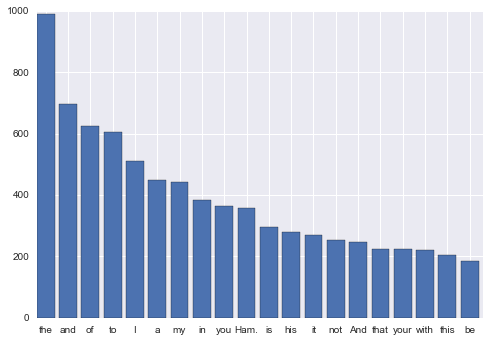

In [32]:
plt.bar(pos, [e[1] for e in topfre]);
plt.xticks(pos+0.4, [e[0] for e in topfre]);